In [1]:
# Shelina Khan-Khutan
# Pima Indians Dataset

import numpy
import pandas
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cross_validation import train_test_split
from numpy.random import permutation
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
import matplotlib
import matplotlib.pyplot as plt
import sklearn.linear_model
from sklearn import neighbors
import math
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
import sklearn.svm
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import svm
import seaborn as sns
import scipy
import sklearn.cluster
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from scipy.cluster.vq import kmeans
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist
from sklearn.decomposition import PCA
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import random as rn
import os

/Users/shelinakhan/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/shelinakhan/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# importing the file
csvfile = open("diabetes.csv", 'r')
diabetes = pandas.read_csv(csvfile)

#preprocessing
# Getting rid of NAs/0s
diabetes[['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]=diabetes[['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0,diabetes[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].mean())

In [3]:
# Preprocessing# normalizing the data
min_max_scaler = preprocessing.MinMaxScaler()
diabetes_scaled = min_max_scaler.fit_transform(diabetes)
diabetes_normalized = pandas.DataFrame(diabetes_scaled, columns=diabetes.columns)

In [4]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
outcome_df = pandas.DataFrame(pandas.value_counts(diabetes['Outcome'].values, sort=False), columns = ['Outcome'])
outcome_df

,Outcome
0,500
1,268


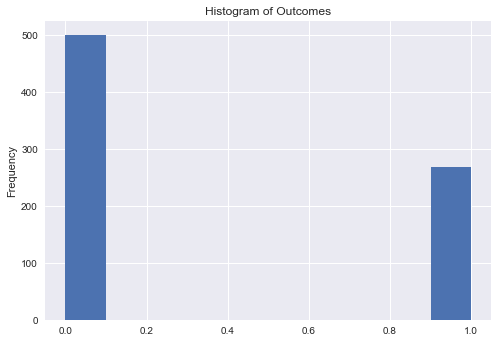

In [6]:
diabetes_Hist =diabetes_normalized.Outcome.plot.hist()
plt.title("Histogram of Outcomes")
plt.show(diabetes_Hist)

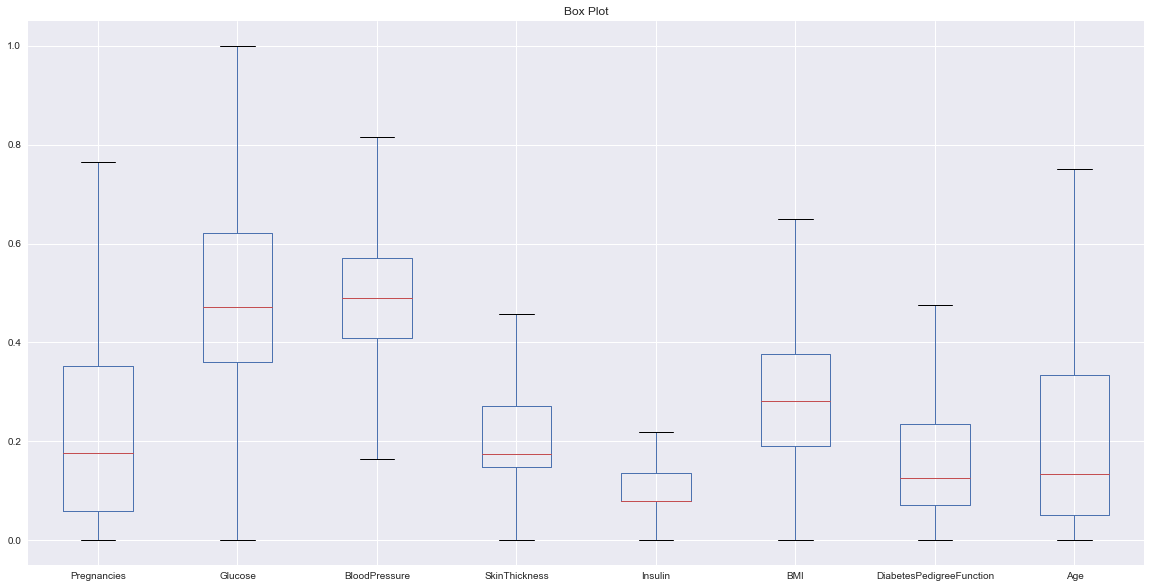

In [7]:
# Data Visualization
remove_outcome =diabetes_normalized.drop(['Outcome'],axis=1)
plt.figure(figsize=(20,10))
diabetes_Box = remove_outcome.boxplot()
plt.title("Box Plot")
plt.show(diabetes_Box)

In [8]:
# Correlation
correlation = diabetes_normalized.corr(method='pearson')
correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.013376,-0.018082,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.013376,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
Insulin,-0.018082,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,0.021546,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


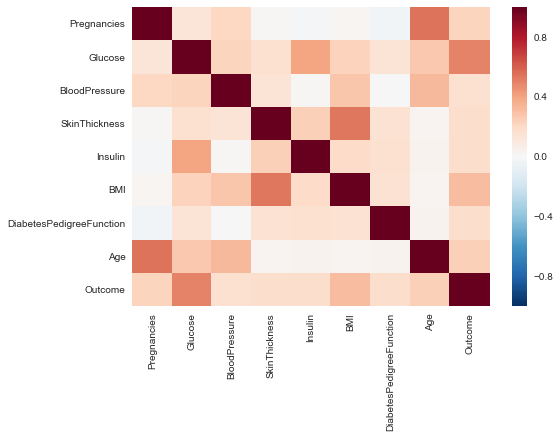

In [9]:
# Correlation Heat map
sns.heatmap(correlation, 
            xticklabels=correlation.columns.values,
            yticklabels=correlation.columns.values)
plt.show()

In [10]:
# KNN
# N Neighbors = 5
# 70% training, 30% testing

X = diabetes_normalized[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = diabetes_normalized["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .30, random_state = 17)
clf = neighbors.KNeighborsClassifier(n_neighbors = 5)
clf.fit(X_train, y_train)
print(clf)
y_expect = y_test
y_predict = clf.predict(X_test)

#Metrics - Precision, Recall, F1-Score, Support
print(metrics.classification_report(y_expect, y_predict))
print('Accuracy:', accuracy_score(y_test, y_predict))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

        0.0       0.78      0.85      0.81       150
        1.0       0.66      0.56      0.60        81

avg / total       0.74      0.74      0.74       231

Accuracy: 0.7445887445887446


[0.9121115360182417, 0.42311131607095526, 0.2715604141746028, 0.1872722827027959, 0.1453647592122811, 0.13295498822844684, 0.11498032346860212, 0.10465012587510146, 0.09651335893569024, 0.08866078643578644, 0.08818264767382901, 0.08424060001354484, 0.08417761987498619, 0.08286213174894229, 0.07874588781984314, 0.07732244177212354, 0.07655257449504699, 0.0735858713235633, 0.07317983482141874, 0.07104075373916957, 0.07028930109330947, 0.06995567061443325, 0.06855822390518773, 0.06705736916436751, 0.06675418226647989, 0.06647148095546893, 0.06588024492694115, 0.06585613576415279, 0.06531664277786892, 0.06513711283674772]


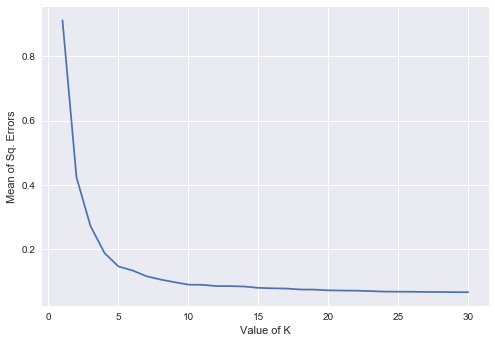

In [11]:
#### KNN

X_columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction', 'Age']
y_column = ['Outcome']

random_indices = permutation(diabetes.index)
test_cutoff = math.floor(len(diabetes)/3)
test = diabetes_normalized.loc[random_indices[1:test_cutoff]]
train = diabetes_normalized.loc[random_indices[test_cutoff:]]

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size =0.3, random_state = 7)



# Finding optimal K -- trying to minimize MSE
K_range = range(1,31)
K_scores = []
for K in K_range:
    knn = KNeighborsRegressor(n_neighbors = K)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    actual = knn.score(X_test, y_test)
    mse = (((predictions - actual) ** 2).sum()) / len(predictions)
    K_scores.append(mse)
print(K_scores)

# Plotting the MSE scores to see which is the optimal K.
# Optimal K looks to be ~2-3
plt.plot(K_range, K_scores)
plt.xlabel("Value of K")
plt.ylabel("Mean of Sq. Errors")
plt.show() #Easier to see as a graph.

In [12]:
print(knn)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=30, p=2,
          weights='uniform')


In [13]:
pandas.DataFrame((list(zip(K_range, K_scores))), columns=['K', 'MSE'])

,K,MSE
0,1,0.912112
1,2,0.423111
2,3,0.271560
3,4,0.187272
4,5,0.145365
5,6,0.132955
6,7,0.114980
7,8,0.104650
8,9,0.096513
9,10,0.088661


In [14]:
# KNN
# N Neighbors = 5
# 80% training, 20% testing

X = diabetes_normalized[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = diabetes_normalized["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .20, random_state = 17)
clf = neighbors.KNeighborsClassifier(n_neighbors = 5)
clf.fit(X_train, y_train)
print(clf)
y_expect = y_test
y_predict = clf.predict(X_test)

#Metrics - Precision, Recall, F1-Score, Support
print(metrics.classification_report(y_expect, y_predict))
print('Accuracy:', accuracy_score(y_test, y_predict))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

        0.0       0.77      0.90      0.83        97
        1.0       0.76      0.54      0.63        57

avg / total       0.76      0.77      0.76       154

Accuracy: 0.7662337662337663


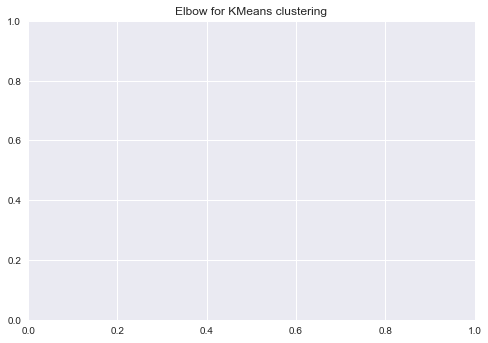

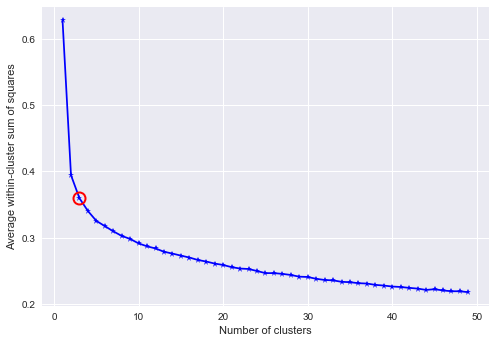

In [15]:
#K means clustering - kmeans

def find_clusters(dataset):
    """Function to find optimal number of clusters in dataset."""
    # cluster data into K=1..10 clusters
    num_clusters = range(1, 50)
    k_means = [kmeans(dataset, k) for k in num_clusters]
    # cluster's centroids
    centroids = [cent for (cent, var) in k_means]
    clusters_dist = [cdist(dataset, cent, 'euclidean') for cent in centroids]
    cidx = [numpy.argmin(_dist, axis=1) for _dist in clusters_dist]
    dist = [numpy.min(_dist, axis=1) for _dist in clusters_dist]
    # Mean within-cluster (sum of squares)
    avg_within_sum_sqrd = [sum(d) / dataset.shape[0] for d in dist]
    return {'cidx': cidx, 'avg_within_sum_sqrd': avg_within_sum_sqrd,
'K': num_clusters}

def plot_elbow_curv(details):
    """Function to plot elbo curv."""
    kidx = 2
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(details['K'], details['avg_within_sum_sqrd'], 'b*-')
    ax.plot(details['K'][kidx], details['avg_within_sum_sqrd'][kidx],
            marker='o', markersize=12, markeredgewidth=2,
            markeredgecolor='r', markerfacecolor='None')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')



def elbow(n):
    """Elbow testing."""
    cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
    df = diabetes_normalized
    kmeans_var = [KMeans(n_clusters=k).fit(df) for k in range(1, n)]
    centroids = [x.cluster_centers_ for x in kmeans_var]
    k_euclid = [cdist(df, cent) for cent in centroids]
    dist = [np.min(ke, axis=1) for ke in k_euclid]
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(df)**2) / df.shape[0]
    bss = tss - wcss
    plt.plot(bss)

dataset = diabetes_normalized
details = find_clusters(dataset)
elbow_kmeans = plot_elbow_curv(details)
plt.show(elbow_kmeans)


In [16]:
#reminder : PCA compresses the datapoints, and puts into a graph to get the 'essence' of the data.
pca=PCA(n_components=2)
cluster=KMeans(n_clusters=2)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data_diabetes=sc.fit_transform(diabetes)
print(data_diabetes) # scaled 

[[ 0.63994726  0.86527574 -0.0210444  ...  0.46849198  1.4259954
   1.36589591]
 [-0.84488505 -1.20598931 -0.51658286 ... -0.36506078 -0.19067191
  -0.73212021]
 [ 1.23388019  2.01597855 -0.68176235 ...  0.60439732 -0.10558415
   1.36589591]
 ...
 [ 0.3429808  -0.02240928 -0.0210444  ... -0.68519336 -0.27575966
  -0.73212021]
 [-0.84488505  0.14197684 -1.01212132 ... -0.37110101  1.17073215
   1.36589591]
 [-0.84488505 -0.94297153 -0.18622389 ... -0.47378505 -0.87137393
  -0.73212021]]


In [17]:
no_outcome = diabetes.drop(['Outcome'],axis=1)
no_outcome['cluster']=cluster.fit_predict(no_outcome)
no_cluster = no_outcome.drop(['cluster'], axis = 1)
no_outcome['pca_x']=pca.fit_transform(diabetes_normalized)[:,0]
no_outcome['pca_y']=pca.fit_transform(diabetes_normalized)[:,1]

In [18]:
no_outcome.groupby('cluster').mean() #means - by cluster

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,pca_x,pca_y
cluster,,,,,,,,,,
0,3.833811,118.461995,72.091248,26.055553,94.691985,32.101746,0.460544,33.157593,-0.026129,0.001854
1,3.957143,153.785714,73.885714,32.100000,357.657143,35.931429,0.584871,34.071429,0.260543,-0.018491


In [19]:
#includes both scaled age, and non scaled age.
diabetes_dataframe =pandas.DataFrame({'Pregnancies':data_diabetes[:,0],'Glucose':data_diabetes[:,1],'BloodPressure':data_diabetes[:,2],
                   'SkinThickness':data_diabetes[:,3],'Insulin':data_diabetes[:,4],'BMI':data_diabetes[:,5],
                   'DiabetesPedegreeFunction':data_diabetes[:,6],'age':data_diabetes[:,7],'Age':diabetes.Age})


#only scaled age
diabetes_dataframe2 = pandas.DataFrame({'Pregnancies':data_diabetes[:,0],'Glucose':data_diabetes[:,1],'BloodPressure':data_diabetes[:,2],
                   'SkinThickness':data_diabetes[:,3],'Insulin':data_diabetes[:,4],'BMI':data_diabetes[:,5],
                   'DiabetesPedegreeFunction':data_diabetes[:,6],'age':data_diabetes[:,7]})



In [20]:
diabetes_dataframe['cluster']=cluster.fit_predict(diabetes_dataframe2)
trend = diabetes_dataframe.drop(['Age','cluster'],axis=1)
diabetes_dataframe['pca_X']=pca.fit_transform(trend)[:,0]
diabetes_dataframe['pca_Y']=pca.fit_transform(trend)[:,1]
# white = no diabetes. 
# black = diabetes.

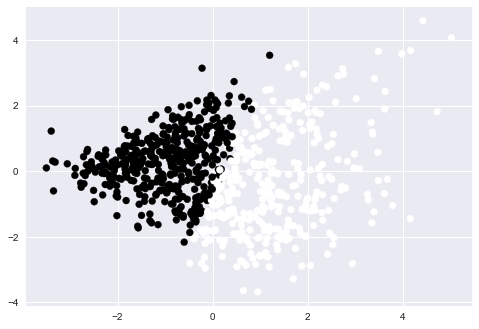

In [21]:
# K-Means Clustering - using PCA
clustering = plt.scatter(diabetes_dataframe.pca_X,diabetes_dataframe.pca_Y,c=diabetes_dataframe.cluster)
plt.show(clustering)

In [22]:
######## Cross - Validation
knn = KNeighborsClassifier(n_neighbors = 17)
scores = cross_val_score(knn, X, y, cv= 10, scoring = 'accuracy')
print(scores)
print("")

# This is the cross-validation accuracy
# For K = 4
print('Mean:', scores.mean()) # The mean of the scores

[0.75324675 0.81818182 0.79220779 0.71428571 0.74025974 0.74025974
 0.80519481 0.79220779 0.73684211 0.82894737]

Mean: 0.7721633629528366


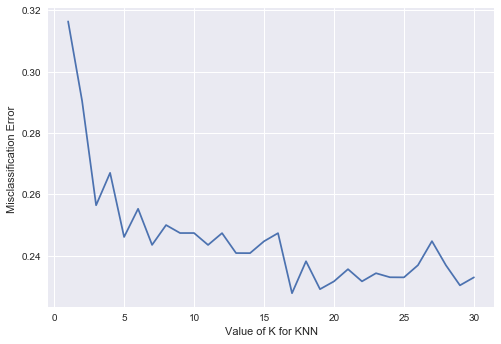

In [23]:
k_range = range(1, 31)
# empty list to store scores
k_scores = []

for k in k_range:   
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(1 - scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Misclassification Error ')
plt.show() #17 is highest accuracy

In [24]:
# SVM
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=52)


classifier = svm.SVC(kernel='linear', C = 1, gamma = 1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

clf = svm.SVC(kernel = 'linear')
clf.fit(X,y)
y_hat = clf.predict(X_test)
classification_performance = accuracy_score(y_hat, y_test)
print("Classification Preformance: ", classification_performance)



y_hat_train = clf.predict(X_train)
y_hat_test = clf.predict(X_test) 

train_acc = accuracy_score(y_hat_train, y_train)
test_acc = accuracy_score(y_hat_test, y_test)

print("Train Set Accuracy: " + str(train_acc))
print("Test Set Accuracy: " + str(test_acc))

Classification Preformance:  0.7857142857142857
Train Set Accuracy: 0.7654723127035831
Test Set Accuracy: 0.7857142857142857


In [25]:
#Neural Networks.

os.environ['PYTHONHASHSEED'] = '0'
numpy.random.seed(42)
rn.seed(12345)
session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)

from keras import backend as K
tf.set_random_seed(1234)

sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

X = diabetes_normalized[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
Y = diabetes_normalized["Outcome"]

model = Sequential()
model.add(Dense(12,input_dim = 8, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
model.fit(X,Y, epochs = 300, batch_size = 10)

scores = model.evaluate(X,Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

#Accuracy = 84.24%

Epoch 1/300
768/768 [==============================] - 1s 1ms/step - loss: 0.6748 - acc: 0.6185
Epoch 2/300
768/768 [==============================] - 0s 166us/step - loss: 0.6359 - acc: 0.6510
Epoch 3/300
768/768 [==============================] - 0s 164us/step - loss: 0.6064 - acc: 0.6549
Epoch 4/300
768/768 [==============================] - 0s 166us/step - loss: 0.5696 - acc: 0.7161
Epoch 5/300
768/768 [==============================] - 0s 163us/step - loss: 0.5311 - acc: 0.7435
Epoch 6/300
768/768 [==============================] - 0s 167us/step - loss: 0.4995 - acc: 0.7617
Epoch 7/300
768/768 [==============================] - 0s 163us/step - loss: 0.4803 - acc: 0.7669
Epoch 8/300
768/768 [==============================] - 0s 168us/step - loss: 0.4636 - acc: 0.7812
Epoch 9/300
768/768 [==============================] - 0s 165us/step - loss: 0.4606 - acc: 0.7760
Epoch 10/300
768/768 [==============================] - 0s 165us/step - loss: 0.4593 - acc: 0.7682
Epoch 11/300
768/768 

768/768 [==============================] - 0s 166us/step - loss: 0.4095 - acc: 0.8099
Epoch 84/300
768/768 [==============================] - 0s 167us/step - loss: 0.4072 - acc: 0.8073
Epoch 85/300
768/768 [==============================] - 0s 164us/step - loss: 0.4097 - acc: 0.7917
Epoch 86/300
768/768 [==============================] - 0s 163us/step - loss: 0.4082 - acc: 0.8073
Epoch 87/300
768/768 [==============================] - 0s 166us/step - loss: 0.4057 - acc: 0.7982
Epoch 88/300
768/768 [==============================] - 0s 164us/step - loss: 0.4058 - acc: 0.8021
Epoch 89/300
768/768 [==============================] - 0s 165us/step - loss: 0.4056 - acc: 0.7995
Epoch 90/300
768/768 [==============================] - 0s 164us/step - loss: 0.4034 - acc: 0.8008
Epoch 91/300
768/768 [==============================] - 0s 174us/step - loss: 0.4079 - acc: 0.7930
Epoch 92/300
768/768 [==============================] - 0s 164us/step - loss: 0.4039 - acc: 0.8086
Epoch 93/300
768/768 [=

768/768 [==============================] - 0s 165us/step - loss: 0.3839 - acc: 0.8099
Epoch 166/300
768/768 [==============================] - 0s 165us/step - loss: 0.3844 - acc: 0.8138
Epoch 167/300
768/768 [==============================] - 0s 165us/step - loss: 0.3813 - acc: 0.8255
Epoch 168/300
768/768 [==============================] - 0s 165us/step - loss: 0.3785 - acc: 0.8151
Epoch 169/300
768/768 [==============================] - 0s 164us/step - loss: 0.3837 - acc: 0.8151
Epoch 170/300
768/768 [==============================] - 0s 163us/step - loss: 0.3801 - acc: 0.8164
Epoch 171/300
768/768 [==============================] - 0s 166us/step - loss: 0.3822 - acc: 0.8151
Epoch 172/300
768/768 [==============================] - 0s 163us/step - loss: 0.3806 - acc: 0.8203
Epoch 173/300
768/768 [==============================] - 0s 163us/step - loss: 0.3870 - acc: 0.8125
Epoch 174/300
768/768 [==============================] - 0s 163us/step - loss: 0.3887 - acc: 0.8060
Epoch 175/300


768/768 [==============================] - 0s 166us/step - loss: 0.3602 - acc: 0.8320
Epoch 248/300
768/768 [==============================] - 0s 163us/step - loss: 0.3655 - acc: 0.8190
Epoch 249/300
768/768 [==============================] - 0s 164us/step - loss: 0.3573 - acc: 0.8320
Epoch 250/300
768/768 [==============================] - 0s 168us/step - loss: 0.3567 - acc: 0.8294
Epoch 251/300
768/768 [==============================] - 0s 163us/step - loss: 0.3581 - acc: 0.8372
Epoch 252/300
768/768 [==============================] - 0s 164us/step - loss: 0.3571 - acc: 0.8385
Epoch 253/300
768/768 [==============================] - 0s 166us/step - loss: 0.3606 - acc: 0.8333
Epoch 254/300
768/768 [==============================] - 0s 167us/step - loss: 0.3577 - acc: 0.8294
Epoch 255/300
768/768 [==============================] - 0s 183us/step - loss: 0.3545 - acc: 0.8320
Epoch 256/300
768/768 [==============================] - 0s 169us/step - loss: 0.3614 - acc: 0.8372
Epoch 257/300


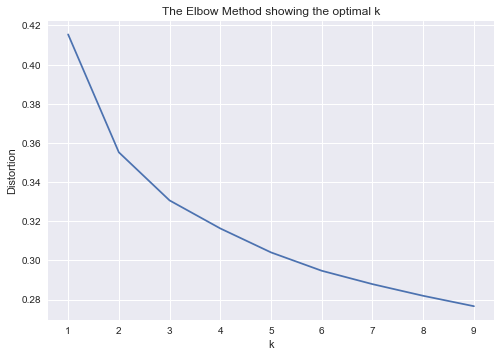

In [26]:
# k means determine k # graph already made -- this one always works, one up top sometimes doesnt.
# use this in paper if the one on top doesnt print.
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(numpy.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

#Plot the elbow
plt.plot(K, distortions)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

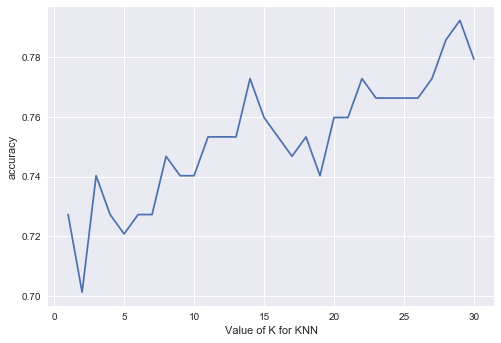

In [27]:
# loading library
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1, 31)
# empty list to store scores
k_scores = []


for k in k_range:   
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    k_scores.append((accuracy_score(y_test, pred)))

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('accuracy')
plt.show()

In [28]:
pandas.DataFrame((list(zip(k_range, k_scores))), columns=['K', 'Accuracy'])

,K,Accuracy
0,1,0.727273
1,2,0.701299
2,3,0.740260
3,4,0.727273
4,5,0.720779
5,6,0.727273
6,7,0.727273
7,8,0.746753
8,9,0.740260
9,10,0.740260
